#  Prediction_Energy Consumption

## Dataset Description:
#### The "Household Power Consumption" dataset contains measurements of electric power consumption in a single household over a period of time. The data includes details recorded every minute from December 2006 to November 2010. Here's a detailed description of each column:

## Dataset Overview:
##### Rows: 2,075,259 (entries/records)
##### Columns: 9 (attributes/features)
##### Time Period: December 2006 - November 2010
##### Granularity: Data is recorded every minute.
### Column Descriptions:

##### Date (object):

The date of the observation in the format DD/MM/YYYY.

##### Time (object):

The time of the observation in the format HH:MM:SS.


##### Global_active_power:

Household global active power in kilowatts (kW).
This refers to the total power consumed by the household appliances.

##### Global_reactive_power:

Household global reactive power in kilovolt-amperes reactive (kVAR).
Reactive power is the portion of electricity that establishes and sustains the electric and magnetic fields of alternating current equipment (not useful power).

##### Voltage (object initially; should be numeric):

Voltage (in volts) supplied to the house during the given minute.

##### Global_intensity (object initially; should be numeric):

Current intensity in amperes (A).
The total electrical current being drawn at that moment.

##### Sub_metering_1 (object initially; should be numeric):

Energy sub-metering for the kitchen (in watt-hours of active energy).
Example appliances: Dishwasher, oven, and microwave.

##### Sub_metering_2 (object initially; should be numeric):

Energy sub-metering for the laundry room (in watt-hours of active energy).
Example appliances: Washing machine, tumble dryer, refrigerator.

##### Sub_metering_3 (float64):
Energy sub-metering for electric water-heater and air-conditioning systems (in watt-hours of active energy)


#### The dataset contains a few missing values, particularly in the Sub_metering_3 column (about 1.25% of the data).

## Defining Problem Statement
The goal is to analyze the household electric power consumption dataset and extract meaningful insights. This could involve understanding consumption patterns, identifying peak usage times, and predicting future power consumption

### Import libraries and Load the dataset

In [43]:
import pandas as pd
import numpy as np

#### 2. Loading the Data

Use Pandas to load the dataset from the .txt file. Since it's delimited by ; , specify the separator

In [44]:
df=pd.read_csv(r"/content/household_power_consumption_DATASET.txt",sep=";")
df

<ipython-input-44-82f93d5f0ee8>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"/content/household_power_consumption_DATASET.txt",sep=";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


### 3.  Data Exploration
Check the shape and column information of the dataset to understand the data types and structure.

#### df.info()
It Provides concise information about the DataFrame, including the number of non-null values, the data type of each column, and memory usage.

Total entries: Total number of rows.

Data types: Shows the data type of each column (e.g., int64, float64, object).

Null values: Indicates whether a column has missing values.

Memory usage: Gives an idea of how much memory the DataFrame is using

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### Converting all columns to dtype

In [46]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'],errors = 'coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'],errors = 'coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'],errors = 'coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'],errors = 'coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'],errors = 'coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'],errors = 'coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'],errors = 'coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


### df.head()
it Displays the first 5 rows of the DataFrame by default, though you can specify any number of rows to display.

usage:

Gives a quick look at the first few rows of the dataset.

it also Helps to verify if the data was loaded correctly and whether the columns are in the expected format

In [47]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### df.tail()
it Displays the last 5 rows of the DataFrame by default, but you can specify the number of rows.

usage:

it  Helps to inspect the most recent or last entries in the dataset, which can be useful for time-series data to ensure data continuity.

In [48]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


## df.shape
It Provides the dimensions of the DataFrame as a tuple (rows, columns).

Quick check to know the number of rows and columns in the dataset
from the dataset we can observe there are 2075259 columns and 9 rows

In [49]:
df.shape

(2075259, 9)

### df.columns
Lists all column names in the DataFrame.

In [50]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

### df.describe()
This function provides summary statistics for the numerical columns in the dataset.

###### Count: The number of non-null values.

##### Mean: The average of the column.

##### Standard Deviation (std): Shows how much the values deviate from the mean.

Min, 25th percentile, 50th percentile (median), 75th percentile, Max: These values help in understanding the spread and distribution of the data.

In [51]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


### df.describe(include="object")

This function helps you analyze categorical or non-numeric data. When applied to object-type columns, it summarizes these columns by providing:

Count: The number of non-null entries in each column.

Unique: The number of unique values in the column.

Top: The most frequent (or "top") value in the column.

Freq: The frequency of the most common value (i.e., how often the "top" value appears)

In [52]:
df.describe(include="object")

,Date,Time
count,2075259,2075259
unique,1442,1440
top,6/12/2008,17:24:00
freq,1440,1442


### Checking for Null Values (df.isnull() and df.isnull().sum())
df.isnull() checks if there are any missing values in each cell, and df.isnull().sum() returns the number of missing values per column.

Usage:

To identify missing or null values that may need handling.

Useful to understand if imputation or dropping missing values is required for certain columns.

In [53]:
df.isnull().any()

,0
Date,False
Time,False
Global_active_power,True
Global_reactive_power,True
Voltage,True
Global_intensity,True
Sub_metering_1,True
Sub_metering_2,True
Sub_metering_3,True


In [54]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


## null_percentage
This will help us to check the percentage of missing values for each column in the DataFrame

In [55]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage

,0
Date,0.000000
Time,0.000000
Global_active_power,1.251844
Global_reactive_power,1.251844
Voltage,1.251844
Global_intensity,1.251844
Sub_metering_1,1.251844
Sub_metering_2,1.251844
Sub_metering_3,1.251844


### **Handling null values**

### * a. Fill with a fixed value 0 *

In [56]:
df.fillna(0)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


### Fill with the column's mean

choosing mean method to fill nan values

In [57]:
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(), inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(), inplace=True)
df['Global_active_power'].fillna(df['Global_active_power'].mean(), inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(), inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(), inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(), inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(), inplace=True)

df

<ipython-input-57-9cc0e76a01a1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(), inplace=True)
<ipython-input-57-9cc0e76a01a1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


checking weather null values are present are not

In [58]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


4. Data encoding

In [59]:
df['Date_Time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Extract year, month, day, hour, and minute from the 'Date_Time' column
df['Year'] = df['Date_Time'].dt.year
df['Month'] = df['Date_Time'].dt.month
df['Day'] = df['Date_Time'].dt.day
df['Hour'] = df['Date_Time'].dt.hour
df['Minute'] = df['Date_Time'].dt.minute

df.tail()

<ipython-input-59-52fff2f563d9>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_Time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time,Year,Month,Day,Hour,Minute
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58
2075255,26/11/2010,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0
2075257,26/11/2010,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010-11-26 21:02:00,2010,11,26,21,2


Finding whether the day is a holiday or not (0 = not holiday, 1= holiday)

In [60]:
import datetime as dt

def is_holiday(date):
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])

    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0
    else:
        return 0.0

for data in [df]:
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))
    data['Light'] = data['Time'].apply(lambda x: 1 if isinstance(x, str) and int(x[:2]) >= 6 and int(x[:2]) < 18 else 0)
    data['Time'] = data['Time'].apply(lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0 if isinstance(x, str) else 0)

In [61]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time,Year,Month,Day,Hour,Minute,Is_holiday,Light
2075254,26/11/2010,0.873611,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58,0.0,0
2075255,26/11/2010,0.874306,0.944,0.0,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59,0.0,0
2075256,26/11/2010,0.875000,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0,0.0,0
2075257,26/11/2010,0.875694,0.934,0.0,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1,0.0,0
2075258,26/11/2010,0.876389,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010-11-26 21:02:00,2010,11,26,21,2,0.0,0


Find if the there is sunlight during the time given in the dataset ( 0600-1800 hours) is 1 (light is there) else 0)

In [62]:
df['Is_Daylight'] = df['Hour'].apply(lambda x: 1 if 6 <= x < 18 else 0)

# Display the last few rows to confirm
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time,Year,Month,Day,Hour,Minute,Is_holiday,Light,Is_Daylight
2075254,26/11/2010,0.873611,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58,0.0,0,0
2075255,26/11/2010,0.874306,0.944,0.0,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59,0.0,0,0
2075256,26/11/2010,0.875000,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0,0.0,0,0
2075257,26/11/2010,0.875694,0.934,0.0,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1,0.0,0,0
2075258,26/11/2010,0.876389,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010-11-26 21:02:00,2010,11,26,21,2,0.0,0,0


5.Data Visualization

1. What is the distribution of voltage values in the dataset?

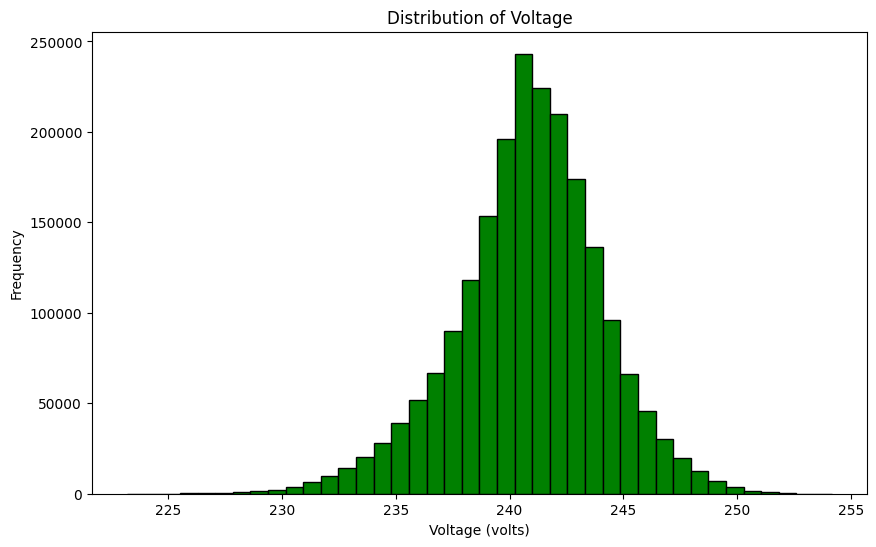

In [65]:
plt.figure(figsize=(10, 6))
plt.hist(df['Voltage'], bins=40, color='green', edgecolor='black')
plt.title('Distribution of Voltage')
plt.xlabel('Voltage (volts)')
plt.ylabel('Frequency')
plt.show()


2. Is there a correlation between global active power and global reactive power?

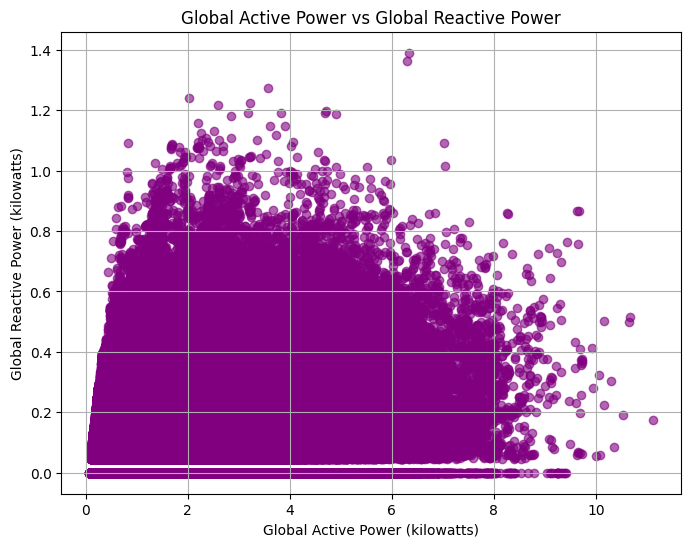

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Global_active_power'], df['Global_reactive_power'], alpha=0.6, color='purple')
plt.title('Global Active Power vs Global Reactive Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Global Reactive Power (kilowatts)')
plt.grid(True)
plt.show()


3. What is the proportion of energy consumed by each sub-metering zone?

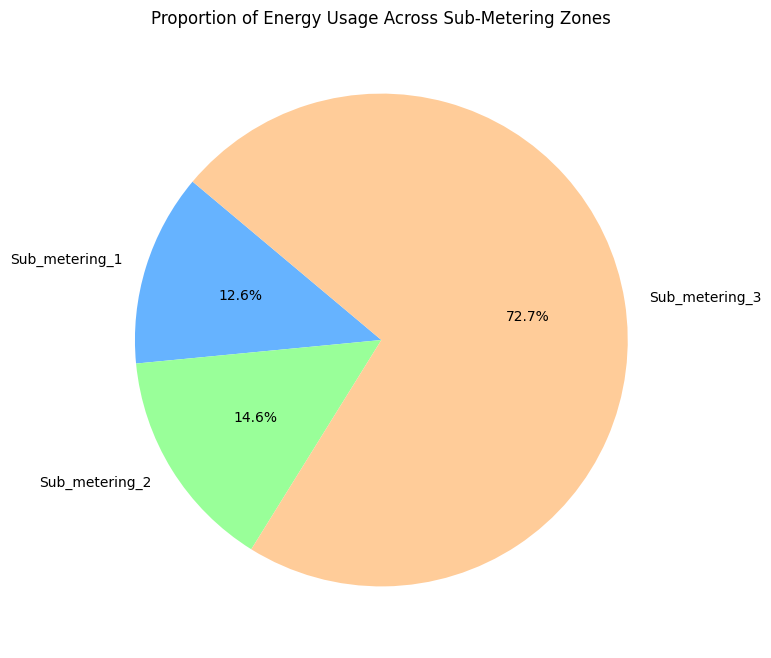

In [71]:
# Calculate total energy usage for each sub-metering zone
sub_metering_totals = [
    df['Sub_metering_1'].sum(),
    df['Sub_metering_2'].sum(),
    df['Sub_metering_3'].sum()
]

# Labels for each sub-metering zone
labels = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sub_metering_totals, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Proportion of Energy Usage Across Sub-Metering Zones')
plt.show()


4. What is the relationship between voltage and global intensity?

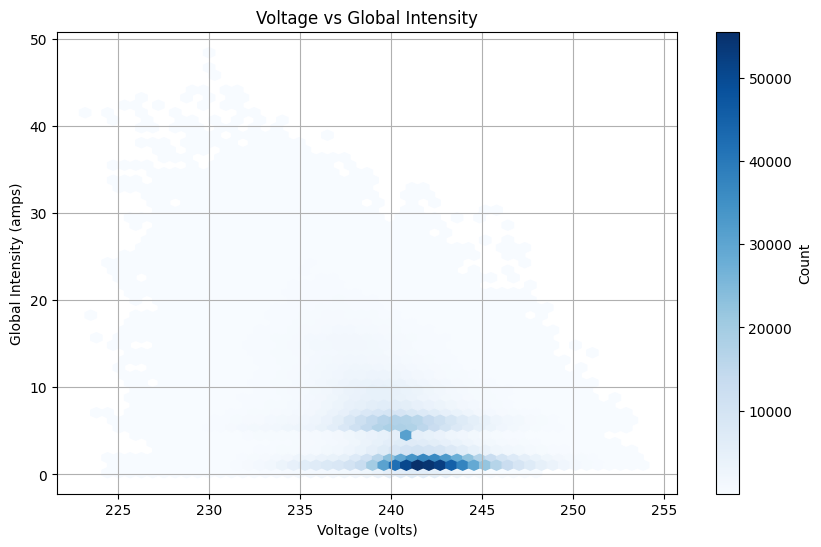

In [74]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['Voltage'], df['Global_intensity'], gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.title('Voltage vs Global Intensity')
plt.xlabel('Voltage (volts)')
plt.ylabel('Global Intensity (amps)')
plt.grid()
plt.show()


5. How are global active power and global intensity related for different ranges of voltage?

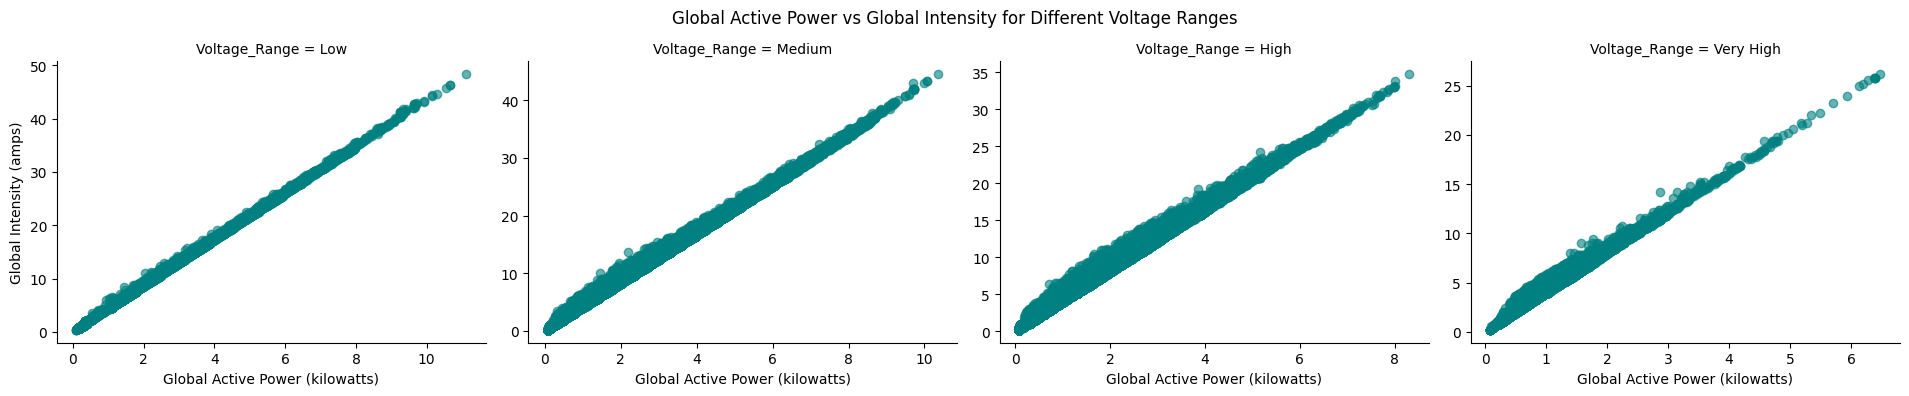

In [75]:
import seaborn as sns

# Bin voltage into categories
df['Voltage_Range'] = pd.cut(df['Voltage'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Create a faceted scatter plot
g = sns.FacetGrid(df, col='Voltage_Range', height=4, aspect=1.2, sharex=False, sharey=False)
g.map(plt.scatter, 'Global_active_power', 'Global_intensity', alpha=0.6, color='teal')
g.set_axis_labels('Global Active Power (kilowatts)', 'Global Intensity (amps)')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Global Active Power vs Global Intensity for Different Voltage Ranges')
plt.show()


Basic Machine Learning Models

In [76]:
from sklearn.model_selection import train_test_split

# Check if the columns exist before attempting to drop them
columns_to_drop = ['Date', 'Date_Time', 'Time', 'Date_Time']
existing_columns = df.columns

# Only drop the columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

if columns_to_drop:  # Check if there are any columns to drop
    df.drop(columns=columns_to_drop, axis=1, inplace=True)

X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Is_holiday,Light,Is_Daylight,Voltage_Range
1347712,0.000,244.74,0.8,0.0,0.0,0.0,2009,7,9,15,16,0.0,1,1,High
378408,0.000,240.60,0.6,0.0,0.0,0.0,2007,9,5,12,12,0.0,1,1,High
280143,0.098,242.40,1.0,0.0,0.0,0.0,2007,6,29,6,27,0.0,1,1,High
670820,0.086,243.92,1.4,0.0,0.0,0.0,2008,3,26,13,44,0.0,1,1,High
1940013,0.098,244.25,1.8,0.0,1.0,1.0,2010,8,24,22,57,0.0,0,0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.256,241.69,1.6,0.0,1.0,0.0,2007,6,14,17,2,0.0,1,1,High
1414414,0.230,241.14,15.6,38.0,0.0,12.0,2009,8,24,22,58,0.0,0,0,High
131932,0.232,239.67,10.0,9.0,0.0,0.0,2007,3,18,8,16,1.0,1,1,High
671155,0.258,235.99,8.6,0.0,3.0,0.0,2008,3,26,19,19,0.0,0,0,Medium


Linear Regression

In [79]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Voltage_Range' or any column with categorical values
label_encoder = LabelEncoder()
X_train['Voltage_Range'] = label_encoder.fit_transform(X_train['Voltage_Range'])
X_test['Voltage_Range'] = label_encoder.transform(X_test['Voltage_Range'])

# Now proceed with training
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)  # Fit the model
linear_reg_predictions = linear_reg.predict(X_test)  # Make predictions

# Calculate RMSE
from sklearn.metrics import mean_squared_error
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
rmse = linear_reg_rmse * 100
print(rmse)


4.020692588640441


In [80]:
accuracy = linear_reg.score(X_test, y_test)*100
accuracy

99.85362009250846

Linear Regression Graph

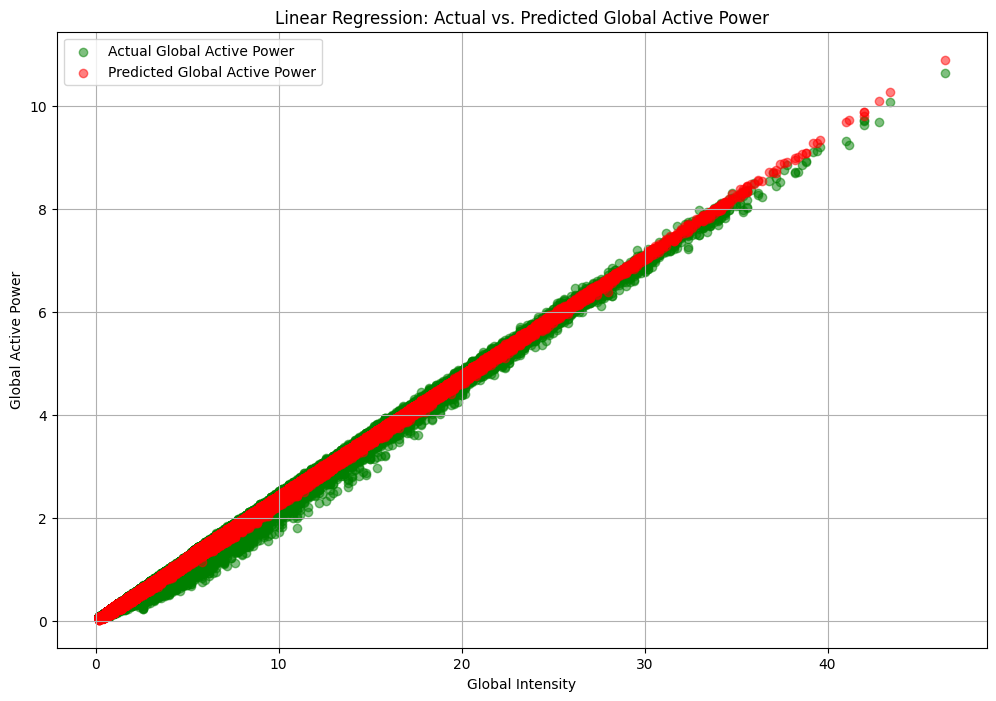

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(X_test['Global_intensity'], y_test, color='green', label='Actual Global Active Power', alpha=0.5) # Actual values
plt.scatter(X_test['Global_intensity'], linear_reg_predictions, color='red', label='Predicted Global Active Power', alpha=0.5) # Predicted values
plt.xlabel('Global Intensity')
plt.ylabel('Global Active Power')
plt.title('Linear Regression: Actual vs. Predicted Global Active Power')
plt.legend()
plt.grid(True)
plt.show()

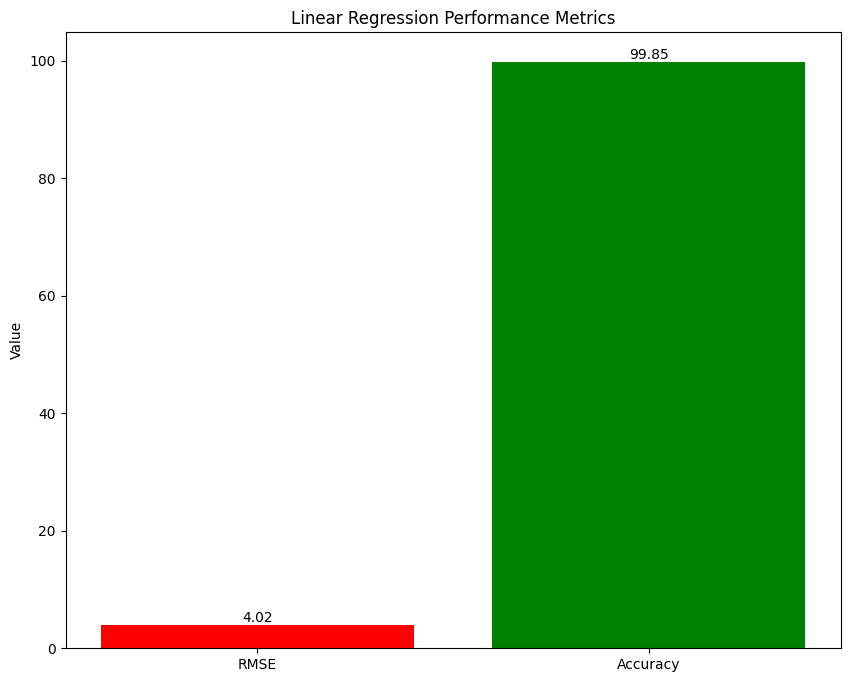

In [84]:
metrics = ['RMSE', 'Accuracy']
values = [rmse, accuracy]

# Create the bar plot
plt.figure(figsize=(10, 8))
plt.bar(metrics, values, color=['red', 'green'])
plt.title('Linear Regression Performance Metrics')
plt.ylabel('Value')

# Add labels to the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.01 , str(round(v,2)), ha='center', va='bottom')

plt.show()

Lasso Regression

In [86]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_predictions = lasso_reg.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
lasso_rmse_percentage = lasso_rmse * 100
lasso_accuracy = lasso_reg.score(X_test, y_test) * 100
print(f"Lasso RMSE: {lasso_rmse_percentage:.2f}%")
print(f"Lasso Accuracy: {lasso_accuracy:.2f}%")

Lasso RMSE: 23.30%
Lasso Accuracy: 95.08%


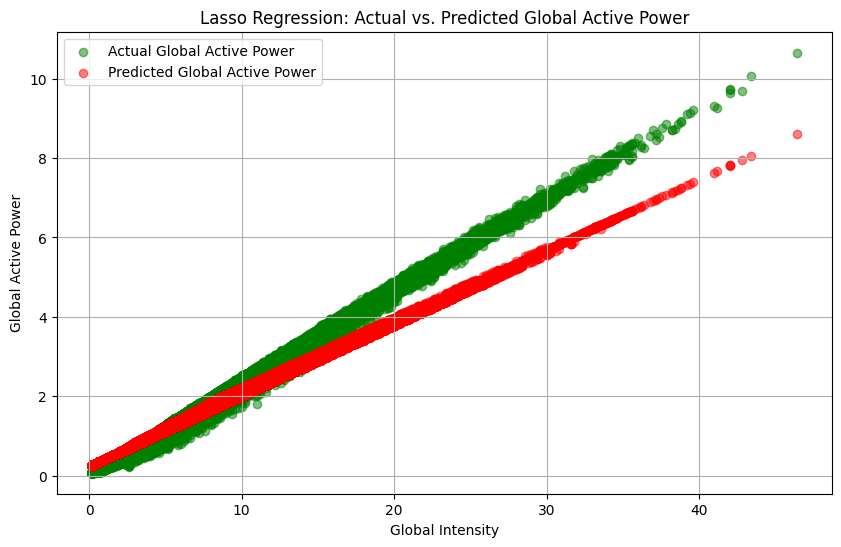

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Global_intensity'], y_test, color='green', label='Actual Global Active Power', alpha=0.5)
plt.scatter(X_test['Global_intensity'], lasso_predictions, color='red', label='Predicted Global Active Power', alpha=0.5)
plt.xlabel('Global Intensity')
plt.ylabel('Global Active Power')
plt.title('Lasso Regression: Actual vs. Predicted Global Active Power')
plt.legend()
plt.grid(True)
plt.show()

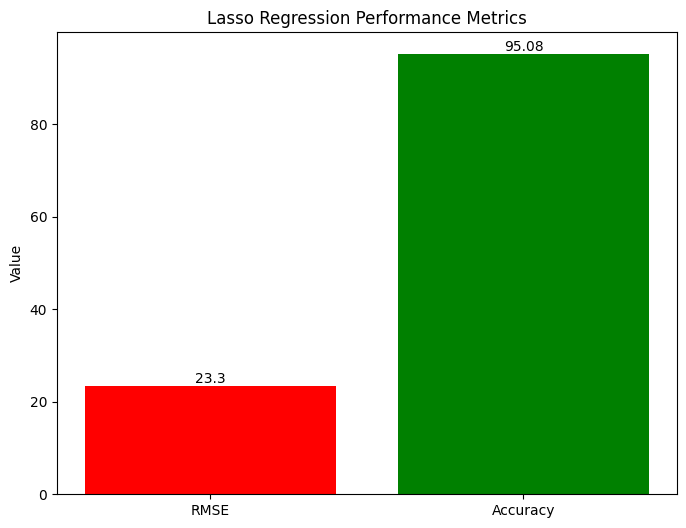

In [88]:
metrics = ['RMSE', 'Accuracy']
values = [lasso_rmse_percentage, lasso_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['red', 'green'])
plt.title('Lasso Regression Performance Metrics')
plt.ylabel('Value')

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.show()

Ridge Regression

In [92]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_predictions = ridge_reg.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_rmse_percentage = ridge_rmse * 100
ridge_accuracy = ridge_reg.score(X_test, y_test) * 100

print(f"Ridge RMSE: {ridge_rmse_percentage:.2f}%")
print(f"Ridge Accuracy: {ridge_accuracy:.2f}%")

Ridge RMSE: 4.02%
Ridge Accuracy: 99.85%


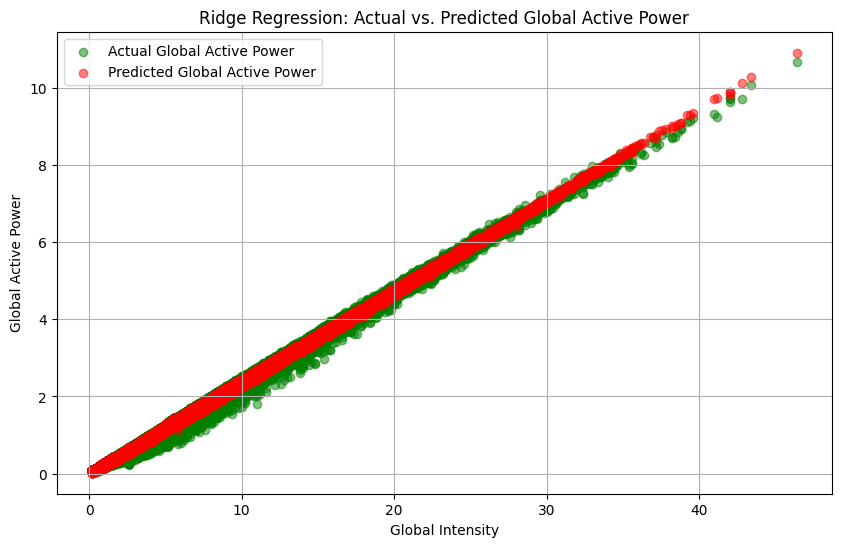

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Global_intensity'], y_test, color='green', label='Actual Global Active Power', alpha=0.5)
plt.scatter(X_test['Global_intensity'], ridge_predictions, color='red', label='Predicted Global Active Power', alpha=0.5)
plt.xlabel('Global Intensity')
plt.ylabel('Global Active Power')
plt.title('Ridge Regression: Actual vs. Predicted Global Active Power')
plt.legend()
plt.grid(True)
plt.show()

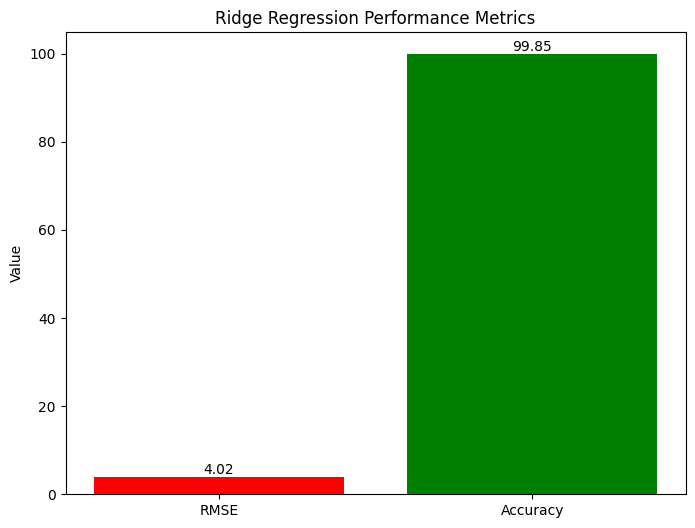

In [95]:
metrics = ['RMSE', 'Accuracy']
values = [ridge_rmse_percentage, ridge_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['red', 'green'])
plt.title('Ridge Regression Performance Metrics')
plt.ylabel('Value')

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.show()

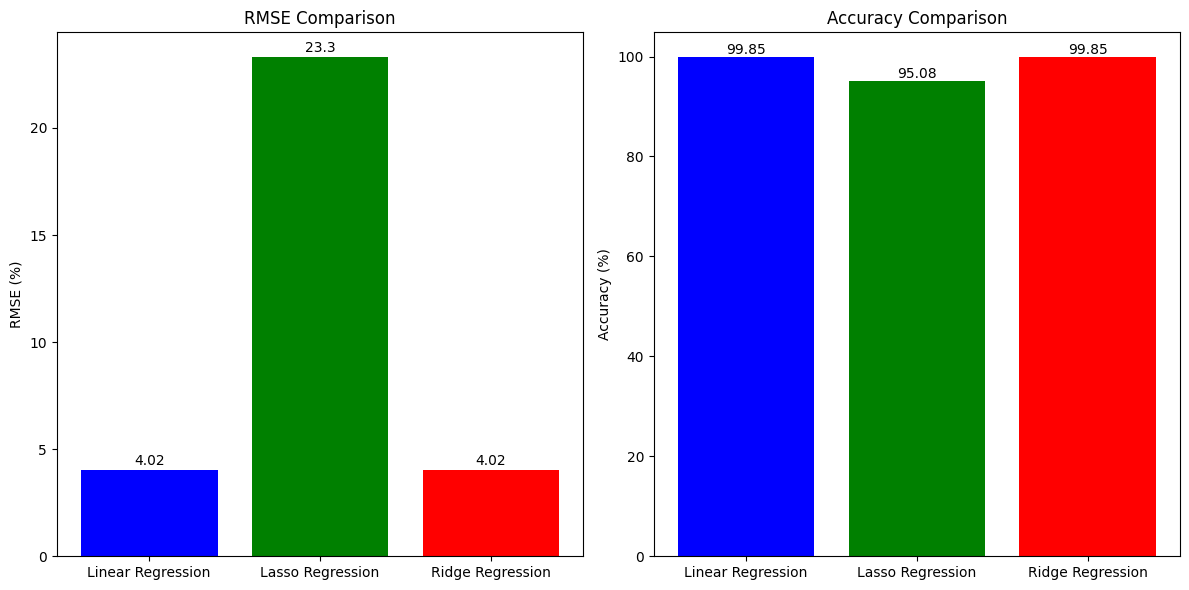

Model Comparison:
Linear Regression:
- RMSE: 4.02%
- Accuracy: 99.85%
--------------------
Lasso Regression:
- RMSE: 23.30%
- Accuracy: 95.08%
--------------------
Ridge Regression:
- RMSE: 4.02%
- Accuracy: 99.85%
--------------------


In [96]:
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
rmse_values = [rmse, lasso_rmse_percentage, ridge_rmse_percentage]
accuracy_values = [accuracy, lasso_accuracy, ridge_accuracy]

plt.figure(figsize=(12, 6))

# RMSE comparison
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['blue', 'green', 'red'])
plt.title('RMSE Comparison')
plt.ylabel('RMSE (%)')
for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', va='bottom')

# Accuracy comparison
plt.subplot(1, 2, 2)
plt.bar(models, accuracy_values, color=['blue', 'green', 'red'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy (%)')
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()


print("Model Comparison:")
for i in range(3):
    print(f"{models[i]}:")
    print(f"- RMSE: {rmse_values[i]:.2f}%")
    print(f"- Accuracy: {accuracy_values[i]:.2f}%")
    print("-" * 20)